# Cyberbullying Text Classification
CS6120 Group 10: Pushyanth Damarapati, Sindhya Balasubramanian, Eileen Chang, Priyanka Padinam

### Description
The rise of social media and the recent couple of years of covid-19 lockdown has led to a concerning increase in cyberbullying cases. In 2020, UNICEF even issued a warning in response to the increased cyberbullying compounded by social distancing and increased screen-time. Those who bully others on the internet have the convenience of being able to hide anonymously behind a screen, but the people who are bullied are likely to develop mental-health issues that persist even after the bullying has ceased. Due to social media’s ability to spread information quickly and anonymously, a single person can easily end up being targeted by a large number of people of various demographics. We aim to create a model that will flag harmful tweets and, therefore, protect targets of cyberbullying.

### Dataset
We will be using a kaggle dataset, Cyberbullying Classification, consisting of more than 47,000 tweets labeled according to 6 classes of cyberbullying: Age, Ethnicity, Gender, Religion, Other type of cyberbullying, and Not cyberbullying. Each row of the dataset will have a tweet and its class of cyberbullying. The dataset is meant to be used to create a multi-classification model to predict cyberbullying type, create a binary classification model to flag potentially harmful tweets, and examine words and patterns associated with each type of cyberbullying.

# Importing Dataset and Libraries

In [ ]:
!pip install contractions -q
!pip install nltk -q
!pip install autocorrect -q 
#!pip install --upgrade matplotlib
!pip install matplotlib==3.1.1 -q 

In [ ]:
import string 
import nltk 
import re # regex
from string import punctuation 
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from nltk.stem import SnowballStemmer 
from contractions import contractions_dict # to solve contractions
from autocorrect import Speller # correct spelling
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

#Libraries 
import matplotlib.pyplot as plt
import seaborn as sns


#Data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('cyberbullying_tweets.csv')
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

**There is not much imbalance between different cyberbulling type. other_cyberbulling will be removed since it may cause a confusion for the models with other cyberbullying class.**

In [ ]:
#df.drop(df[df['cyberbullying_type'] == 'other_cyberbullying'].index, inplace = True)
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

# 1. Data Preprocessing

In [ ]:
# Renaming Categories
df = df.rename(columns={'tweet_text': 'text', 'cyberbullying_type': 'sentiment'})

In [ ]:
# Checking 10 samples
df.sample(10)

,text,sentiment
32469,jokes on the girls who bullied me in high scho...,age
3321,@Charmieos @PendragonTarot *We* can't take any...,not_cyberbullying
38067,shawty mad she thought she was gonna be able t...,age
19512,"“‘A Christian woman,’ he said contemptuously, ...",religion
6651,3. Kat and Andre,not_cyberbullying
44461,HELL NO DUMB STUPID BITCH TF WRONG WITH BETTER...,ethnicity
40817,@princeadmak so fuck you go back to Africa you...,ethnicity
26660,@petfish burn that mother down,other_cyberbullying
33679,MY EX BFF/HIGH SCHOOL BULLY WAS THERE. IM DONE,age
13466,can we start cancelling men who call women “fe...,gender


In [ ]:
df["target_bullying"] = np.where(df['sentiment']!="not_cyberbullying",1,0)
df

,text,sentiment,target_bullying
0,"In other words #katandandre, your food was cra...",not_cyberbullying,0
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,0
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,0
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,0
...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,1
47688,Turner did not withhold his disappointment. Tu...,ethnicity,1
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,1
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,1


In [ ]:
df['sentiment'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["type_bullying"] = LE.fit_transform(df["sentiment"])
df

,text,sentiment,target_bullying,type_bullying
0,"In other words #katandandre, your food was cra...",not_cyberbullying,0,3
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,0,3
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,0,3
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,0,3
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,0,3
...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,1,1
47688,Turner did not withhold his disappointment. Tu...,ethnicity,1,1
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,1,1
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,1,1


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('omw-1.4')
sw_eng = stopwords.words('english')
def clean_review(review):
    '''
    Input:
        review: a string containing a review.
    Output:
        review_cleaned: a processed review. 

    '''
    review_in_lowercase = review.lower()
    no_punctuation = review_in_lowercase.translate(review_in_lowercase.maketrans('', '', string.punctuation))
    no_url = re.sub(r'https?:\/\/.*[\r\n]*','', no_punctuation)
    review_tokens = word_tokenize(no_url)
    no_stopwords_tokens = [token for token in review_tokens if not token in sw_eng]
    porter = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    review_cleaned = ''
    
    for each in no_stopwords_tokens:
        review_cleaned = review_cleaned + lemmatizer.lemmatize(each) + " "
    
    return review_cleaned

df['text'] = df['text'].apply(lambda x : clean_review(x))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
df['target_bullying'].value_counts()

1    39747
0     7945
Name: target_bullying, dtype: int64

# Clustering

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

vector = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
X = vector.fit_transform(df['text'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


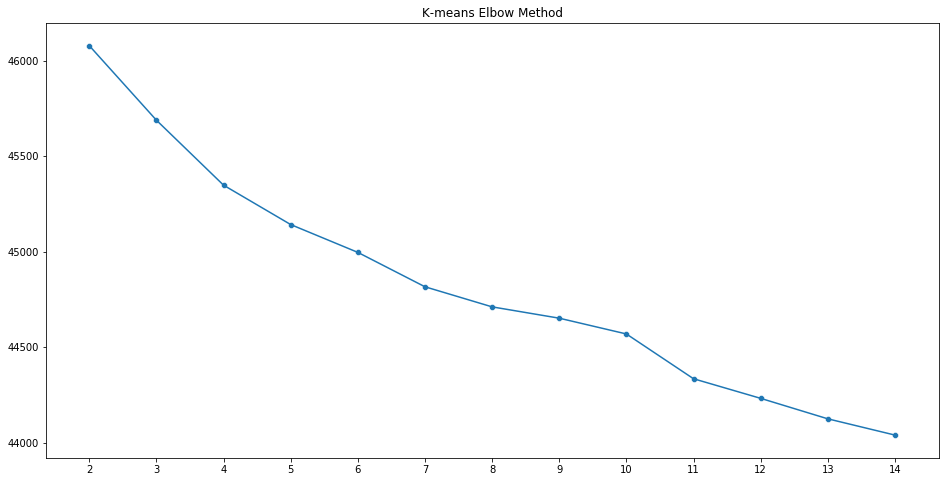

TypeError: ignored

In [ ]:
inertias = []
for cluster in range(2,15):
  kmeans = KMeans(n_clusters=cluster)
  kmeans.fit(X)
  inertias.append(kmeans.inertia_)

#!pip install -U matplotlib -q
plt.figure(figsize = (16,8))
plt.plot(range(2,15),inertias)
sns.scatterplot(range(2,15),inertias)
plt.xticks(range(2,15))
plt.title("K-means Elbow Method")
plt.show()
plt.imsave('kmeans-elbow.png')

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.labels_

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(X.toarray())
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [ ]:
df['cluster'] = labels
df['x0'] = x0
df['x1'] = x1

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                612096    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [ ]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X).groupby(labels).mean() # groups the TF-IDF vector by cluster
    terms = vector.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(15)


Cluster 0
dont,men,think,cyrus,miley,made,like,prison,making,people,funny,make,gay,rape,joke

Cluster 1
year,people,friend,get,would,kid,one,got,middle,like,bully,girl,bullied,high,school

Cluster 2
white,get,shut,nigga,mad,fucking,shit,bitch,rt,tayyoung,obama,as,nigger,dumb,fuck

Cluster 3
get,black,know,right,christian,one,dont,people,woman,im,like,idiot,muslim,rt,mkr


In [ ]:
['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity']

In [ ]:
#!pip install -U matplotlib
plt.figure(figsize=(12, 7))
plt.title("TF-IDF + KMeans clustering", fontdict={"fontsize": 18})
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()

# ANN

In [ ]:
df.head()

In [ ]:
import tensorflow as tf                                                         
from tensorflow import keras

tf.random.set_seed(42)                                                          

#keep_prob = tf.placeholder(tf.float32)

# complete this linear model in tensorflow
def build_model(X):
    # layer 1 : input layer
    inp = tf.keras.Input((X.shape[1],))
    model = tf.keras.Sequential()

    # layer 2 : add the dense layer with 64 units and relu activation
    model.add(tf.keras.layers.Dense(64, activation='relu'))

    # layer 3 : add the dropout layer with dropout rate of 0.5
    model.add(tf.keras.layers.Dropout(0.5))
    # layer 4 : add the dense layer with 32 units with tanh activation and with l2 regularization
    model.add(tf.keras.layers.Dense(32, activation='tanh', kernel_regularizer='l2'))

    # layer 5 : add the dropout layer with dropout rate of 0.5
    model.add(tf.keras.layers.Dropout(0.5))

    # layer 6 : add the dense layer with 16 units with tanh activation and with l2 regularization
    model.add(tf.keras.layers.Dense(16, activation='tanh', kernel_regularizer='l2'))

    # layer 7 : add the dropout layer with dropout rate of 0.5
    model.add(tf.keras.layers.Dropout(0.5))

    # layer 8 : output layer with units equal to 1 and activation as sigmoid
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # use loss as binary crossentropy, optimizer as rmsprop and evaluate model on auc 
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=[tf.keras.metrics.AUC(),tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

    return model


In [ ]:
y = df['target_bullying'].values

In [ ]:
from sklearn.model_selection import train_test_split
X = X.toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)

In [ ]:
model = build_model(X_train)
histroy = model.fit(X_train,y_train,epochs=30,batch_size = 64,validation_data = (X_test,y_test)) 

Epoch 1/30
597/597 [==============================] - 6s 7ms/step - loss: 0.4678 - auc_1: 0.8209 - binary_accuracy: 0.8472 - recall_1: 0.9755 - precision_1: 0.8599 - val_loss: 0.3192 - val_auc_1: 0.8958 - val_binary_accuracy: 0.8501 - val_recall_1: 0.9245 - val_precision_1: 0.8985
Epoch 2/30
597/597 [==============================] - 4s 6ms/step - loss: 0.3102 - auc_1: 0.8929 - binary_accuracy: 0.8613 - recall_1: 0.9503 - precision_1: 0.8906 - val_loss: 0.2977 - val_auc_1: 0.8994 - val_binary_accuracy: 0.8576 - val_recall_1: 0.9551 - val_precision_1: 0.8835
Epoch 3/30
597/597 [==============================] - 4s 6ms/step - loss: 0.2938 - auc_1: 0.9009 - binary_accuracy: 0.8641 - recall_1: 0.9498 - precision_1: 0.8938 - val_loss: 0.2879 - val_auc_1: 0.9024 - val_binary_accuracy: 0.8546 - val_recall_1: 0.9267 - val_precision_1: 0.9016
Epoch 4/30
597/597 [==============================] - 4s 6ms/step - loss: 0.2824 - auc_1: 0.9085 - binary_accuracy: 0.8701 - recall_1: 0.9527 - precision_

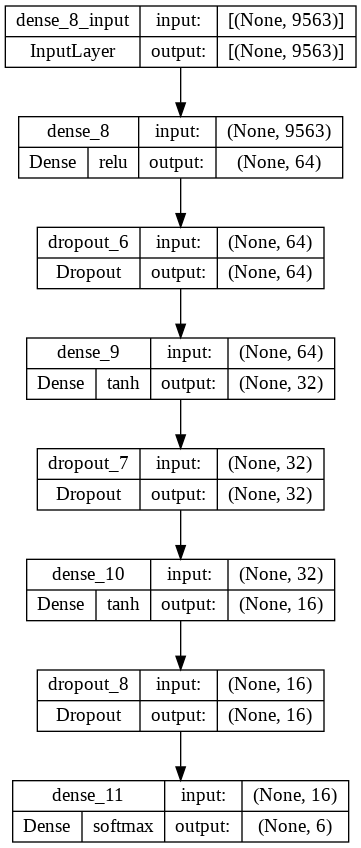

In [ ]:
from keras.utils import plot_model
plot_model(model,'model.png',show_shapes=True,show_layer_activations=True)

In [ ]:
def plot_graph(metric, history):
  print(f"\n\nBelow Displayed is a graph of {metric} vs val {metric}\n\n\n")
  keys = list(history.history.keys())
  train_key = [key for key in keys if key.startswith(metric)][0]
  test_key = [key for key in keys if key.startswith(f"val_{metric}")][0]
  plt.plot(history.history[train_key])
  plt.plot(history.history[test_key])
  plt.title(f'model {metric}')
  plt.ylabel(metric)
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [ ]:
len(model.layers)

7



Below Displayed is a graph of loss vs val loss





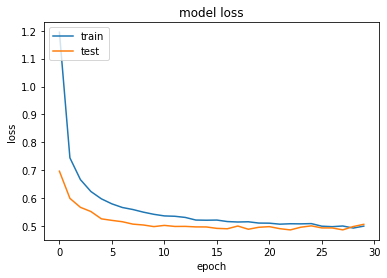



Below Displayed is a graph of auc vs val auc





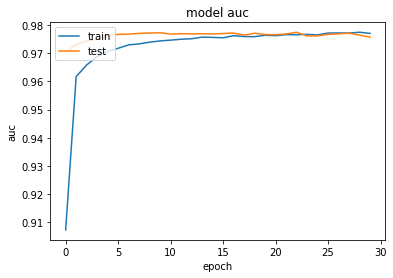



Below Displayed is a graph of recall vs val recall





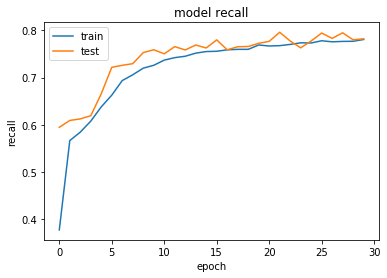



Below Displayed is a graph of precision vs val precision





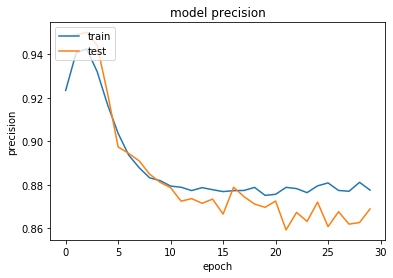



Below Displayed is a graph of accuracy vs val accuracy





IndexError: ignored

In [ ]:
# plot train loss vs val loss,
plot_graph('loss',history)
# plot train auc vs val auc
plot_graph('auc',history)
# plot train recall vs val recall
plot_graph('recall',history)
# plot train precision vs val precision
plot_graph('precision',history)
# plot train accuracy vs val accuracy
plot_graph('accuracy',history)

# ANN 2

In [ ]:
def build_model(X):
    # layer 1 : input layer
    inp = tf.keras.Input((X.shape[1],))
    model = tf.keras.Sequential()

    # layer 2 : add the dense layer with 64 units and relu activation
    model.add(tf.keras.layers.Dense(64, activation='relu'))

    # layer 3 : add the dropout layer with dropout rate of 0.5
    model.add(tf.keras.layers.Dropout(0.5))
    # layer 4 : add the dense layer with 32 units with tanh activation and with l2 regularization
    model.add(tf.keras.layers.Dense(32, activation='tanh', kernel_regularizer='l2'))

    # layer 5 : add the dropout layer with dropout rate of 0.5
    model.add(tf.keras.layers.Dropout(0.5))

    # layer 6 : add the dense layer with 16 units with tanh activation and with l2 regularization
    model.add(tf.keras.layers.Dense(16, activation='tanh', kernel_regularizer='l2'))

    # layer 7 : add the dropout layer with dropout rate of 0.5
    model.add(tf.keras.layers.Dropout(0.5))

    # layer 8 : output layer with units equal to 1 and activation as sigmoid
    model.add(tf.keras.layers.Dense(6, activation='softmax'))

    # use loss as binary crossentropy, optimizer as rmsprop and evaluate model on auc 
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=[tf.keras.metrics.AUC(),tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

    return model


In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = df['type_bullying'].values
y = enc.fit_transform(y.reshape(-1,1)).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
#X = X.toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)

In [ ]:
model = build_model(X_train)
history = model.fit(X_train,y_train,epochs=30,batch_size = 32,validation_data = (X_test,y_test))

Epoch 1/30
1193/1193 [==============================] - 9s 7ms/step - loss: 1.1946 - auc_2: 0.9073 - categorical_accuracy: 0.6300 - recall_2: 0.3775 - precision_2: 0.9234 - val_loss: 0.6965 - val_auc_2: 0.9705 - val_categorical_accuracy: 0.7653 - val_recall_2: 0.5948 - val_precision_2: 0.9484
Epoch 2/30
1193/1193 [==============================] - 7s 6ms/step - loss: 0.7444 - auc_2: 0.9617 - categorical_accuracy: 0.7492 - recall_2: 0.5666 - precision_2: 0.9406 - val_loss: 0.5992 - val_auc_2: 0.9731 - val_categorical_accuracy: 0.7981 - val_recall_2: 0.6093 - val_precision_2: 0.9489
Epoch 3/30
1193/1193 [==============================] - 7s 6ms/step - loss: 0.6664 - auc_2: 0.9659 - categorical_accuracy: 0.7612 - recall_2: 0.5846 - precision_2: 0.9424 - val_loss: 0.5671 - val_auc_2: 0.9743 - val_categorical_accuracy: 0.7997 - val_recall_2: 0.6125 - val_precision_2: 0.9501
Epoch 4/30
1193/1193 [==============================] - 7s 6ms/step - loss: 0.6237 - auc_2: 0.9688 - categorical_accur

In [ ]:
from keras.utils import plot_model
plot_model(model,'model.png',show_shapes=True,show_layer_activations=True)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                612096    
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 6)                